# **OpenAI SDK for Python Samples**

OpenAI Python SDK has two versions on the market, based on version 0.28.1 or 1.x, mainly for API access of different OpenAI models. Although many related SDKs are still on 0.28.1, as time goes by, 1.x SDKs have been gradually integrated into related content. Therefore, it is recommended that all beginners use the latest OpenAI SDK 

In [1]:
! pip install openai -U
! pip install python-dotenv -U
! pip install pillow -U

ERROR: unknown command "insall" - maybe you meant "install"


#### *import Azure OpenAI from OpenAI SDK*

In [2]:
import os
import dotenv
from openai import AzureOpenAI



In [3]:
dotenv.load_dotenv()

True

In [4]:
aoai_endpoint = os.environ['AZURE_OPENAI_ENDPOINT']
aoai_key = os.environ['AZURE_OPENAI_KEY']   
aoai_version = os.environ['AZURE_OPENAI_VERSION']  

### *init AzureOpenAI*

You need to get Azure OpenAI Service API Key and Endpoint in your azure portal

In [5]:
client = AzureOpenAI(
  azure_endpoint = aoai_endpoint, 
  api_key = aoai_key,  
  api_version = aoai_version
)

## **Text Completion**

Text completion is the most classic OpenAI feature. You can do text generation through it. In OpenAI, we initially used the GPT-3 davinci model for text completion. Now we use gpt-3.5-turbo-instruct to implement text completion.

OpenAI's text generation models (often called generative pre-trained transformers or large language models) have been trained to understand natural language, code, and images. The models provide text outputs in response to their inputs. The inputs to these models are also referred to as "prompts". Designing a prompt is essentially how you “program” a large language model model, usually by providing instructions or some examples of how to successfully complete a task.

Using OpenAI's text generation models, you can build applications to:

- Draft documents

- Write computer code

- Answer questions about a knowledge base

- Analyze texts

- Give software a natural language interface

- Tutor in a range of subjects

- Translate languages

- Simulate characters for games

In [6]:
response = client.completions.create(model='Your Azure OpenAI Service gpt-35-turbo-instruct Deployment Name' , prompt="如何学习好生成式人工智能", max_tokens=1000)

In [7]:
response.choices[0].text

'\n\n1. 了解生成式人工智能的基本概念和原理：学习生成式人工智能的前提是要了解其基本概念和原理。这包括生成式模型的分类、工作原理、常用算法以及应用场景等。\n\n2. 学习相关数学知识：生成式人工智能使用了很多数学模型和方法，如概率论、线性代数、微积分等。因此，有一定的数学基础能够帮助你更好地理解和应用生成式人工智能。\n\n3. 掌握编程技能：生成式人工智能需要编程来实现其算法和模型，因此掌握编程技能是必不可少的。建议选择一门流行的编程语言，如Python、Java等，学习其基本语法和相关库。\n\n4. 学习常用的生成式人工智能算法：熟悉常用的生成式人工智能算法可以帮助你理解其原理和运行机制。常见的算法包括GAN、VAE、Seq2Seq等。\n\n5. 实践项目：学以致用是学习生成式人工智能的重要方法。通过实践项目，可以将理论知识应用到实际问题中，加深对生成式人工智能的理解并提升技能。\n\n6. 关注最新研究和应用：生成式人工智能领域发展迅速，每天都会有新的研究成果和应用案例出现。关注相关的学术论文和业界动态，可以帮助你跟进最新的技术进展和趋势。\n\n7. 加入相关的社区和论坛：加入生成式人工智能相关的社区和论坛，可以和其他人交流学习经验、分享资源和讨论最新话题，拓展视野并获得学习的支持。\n\n8. 保持好奇心和持续学习：生成式人工智能领域发展非常迅速，保持好奇心和持续学习能够让你跟上最新的技术发展，不断提升自己的能力。'

## **Chat Completion**

Chat models take a list of messages as input and return a model-generated message as output. Although the chat format is designed to make multi-turn conversations easy, it’s just as useful for single-turn tasks without any conversation.

Using Chat, as the name suggests, is to generate more context in the chat scene. You can implement this scenario through gpt-4, gpt-4 turbo, gpt-3.5-turbo

The main input is the messages parameter. Messages must be an array of message objects, where each object has a role (either "system", "user", or "assistant") and content. Conversations can be as short as one message or many back and forth turns.

Typically, a conversation is formatted with a system message first, followed by alternating user and assistant messages.

The system message helps set the behavior of the assistant. For example, you can modify the personality of the assistant or provide specific instructions about how it should behave throughout the conversation. However note that the system message is optional and the model’s behavior without a system message is likely to be similar to using a generic message such as "You are a helpful assistant."

The user messages provide requests or comments for the assistant to respond to. Assistant messages store previous assistant responses, but can also be written by you to give examples of desired behavior.



In [8]:
response = client.chat.completions.create(
    model="Your Azure OpenAI Service gpt-35-turbo Deployment Name", 
    messages=[
        {"role": "system", "content": "You are a AI teacher."},
        {"role": "user", "content": "Can you explain what is Machine Learning?"}
    ]
)

In [9]:
response.choices[0].message.content

'Machine learning is a subfield of artificial intelligence that focuses on the development of algorithms and statistical models that allow computers to automatically learn and improve from data without being explicitly programmed. In traditional programming, developers write code that instructs computers how to handle specific tasks. However, in machine learning, computers are given the ability to learn and make decisions on their own based on patterns and examples in the data they are exposed to.\n\nAt the core of machine learning, there are three key components: the model, the training data, and the learning algorithm. The model represents the knowledge or patterns extracted from the data, and the learning algorithm enables the model to adjust its internal parameters based on the training data. This adjustment process is known as training the model. Once the model is trained, it can be used to make predictions or decisions on new, unseen data.\n\nMachine learning algorithms can be br

## **Image generation**

The ability to generate images from text is a very powerful function. OpenAI's image generation is mainly based on the DALL·E model, and now it mainly relies on DALL·E 3 for cooperation.

The Images API provides three methods for interacting with images:

- Creating images from scratch based on a text prompt (DALL·E 3 and DALL·E 2)
  
- Creating edited versions of images by having the model replace some areas of a pre-existing image, based on a new text prompt (DALL·E 2 only)
  
- Creating variations of an existing image (DALL·E 2 only)

In [10]:
result = client.images.generate(
    model="Your Azure OpenAI Service DALL·E 3 Deployment Name", 
    prompt="Chinese New Year picture for the Year of the Dragon",
    n=1
)

In [11]:
import os
import requests
from PIL import Image
import json

In [12]:
json_response = json.loads(result.model_dump_json())

In [13]:
image_dir = os.path.join(os.curdir, 'images')

In [14]:
if not os.path.isdir(image_dir):
    os.mkdir(image_dir)

In [15]:
image_path = os.path.join(image_dir, 'generated_image.png')

In [16]:
image_url = json_response["data"][0]["url"]  # extract image URL from response
generated_image = requests.get(image_url).content  # download the image
with open(image_path, "wb") as image_file:
    image_file.write(generated_image)

In [17]:
image = Image.open(image_path)

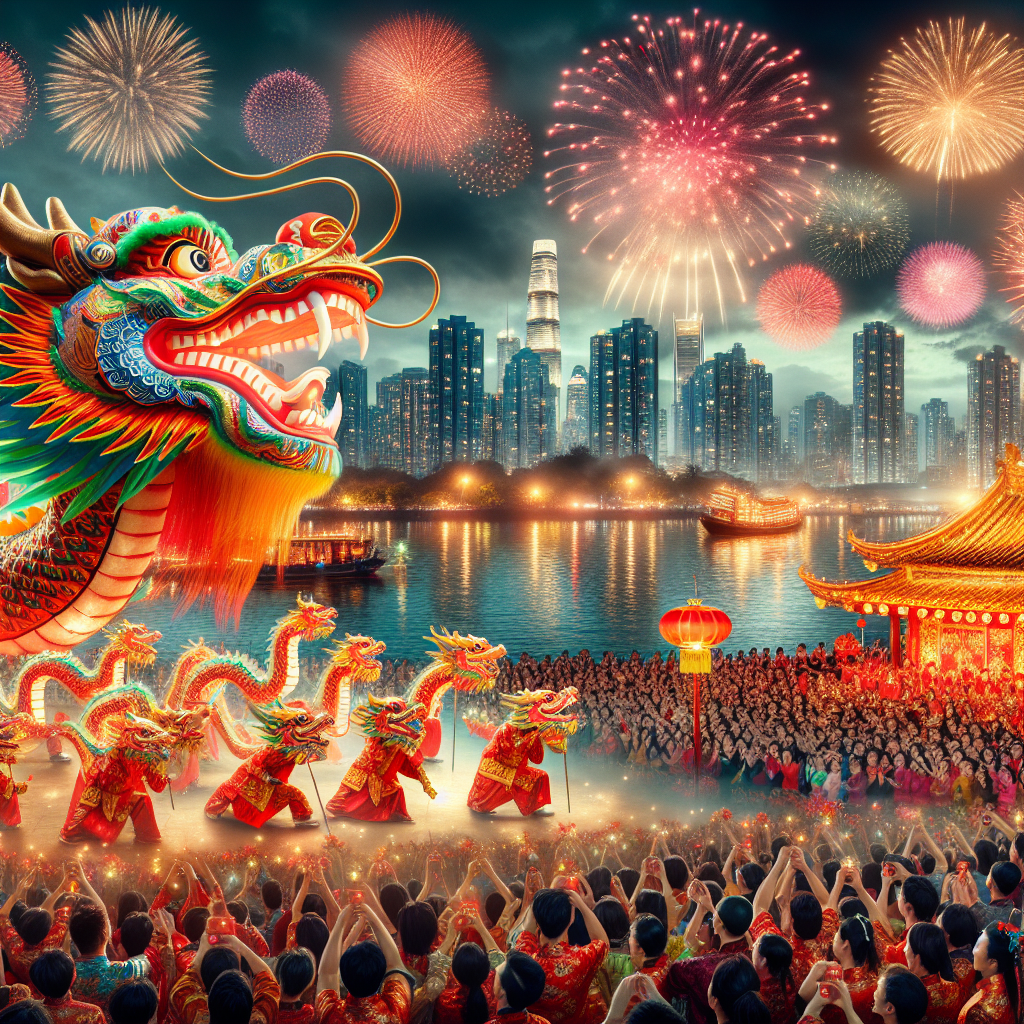

In [18]:

image